# Testing Feedforward Neural Network using TensorFlow


In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from Model import create_model

plt.rcParams["figure.dpi"] = 600

2023-04-07 10:27:56.036821: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Basic Test (If sum of `N` random numbers between 0 - 1 is greater than `N / 2`)


**Creating Testing/Training data**


In [2]:
NPL = [4, 10, 10, 10, 1]
TRAINING_EXAMPLES = 5000
TESTING_EXAMPLES = 1000

train_X = np.random.random(size=(TRAINING_EXAMPLES, NPL[0]))
train_y = (train_X.sum(1, keepdims=True) > (NPL[0] / 2)).astype(float)

test_X = np.random.random(size=(TESTING_EXAMPLES, NPL[0]))
test_y = (test_X.sum(1, keepdims=True) > (NPL[0] / 2)).astype(float)


**Creating Model**


In [3]:
model = create_model(NPL)
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.3),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=["accuracy"],
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 10)                50        
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


**Training Model**


In [4]:
history = model.fit(train_X, train_y, epochs=20)

Epoch 1/20
157/157 [==============================] - 1s 1ms/step - loss: 0.2508 - accuracy: 0.5028
Epoch 2/20
157/157 [==============================] - 0s 917us/step - loss: 0.2506 - accuracy: 0.5082
Epoch 3/20
157/157 [==============================] - 0s 1ms/step - loss: 0.2506 - accuracy: 0.4946
Epoch 4/20
157/157 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.5010
Epoch 5/20
157/157 [==============================] - 0s 1ms/step - loss: 0.2505 - accuracy: 0.5000
Epoch 6/20
157/157 [==============================] - 0s 1ms/step - loss: 0.2506 - accuracy: 0.5064
Epoch 7/20
157/157 [==============================] - 0s 917us/step - loss: 0.2507 - accuracy: 0.4948
Epoch 8/20
157/157 [==============================] - 0s 934us/step - loss: 0.2505 - accuracy: 0.5026
Epoch 9/20
157/157 [==============================] - 0s 1ms/step - loss: 0.2507 - accuracy: 0.4892
Epoch 10/20
157/157 [==============================] - 0s 1ms/step - loss: 0.2506 - accuracy: 

**Testing Model**


In [5]:
results = model.evaluate(test_X, test_y)
print(f"Test loss: {results[0]}, Test accuracy: {results[1]}")

32/32 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.5020
Test loss: 0.25000742077827454, Test accuracy: 0.5019999742507935


In [6]:
TEST_EXAMPLE = 23

prediction = model.predict(test_X[TEST_EXAMPLE, None])

print(
    f"Sum of testing data ({np.sum(test_X[TEST_EXAMPLE])}) is {'greater' if test_y[TEST_EXAMPLE, 0] else 'less'} than {NPL[0] / 2}"
)
print(f"Expected output is {test_y[TEST_EXAMPLE, 0]}")
print(f"Network predicted: {prediction[0, 0]}")


1/1 [==============================] - 0s 124ms/step
Sum of testing data (1.6198306356609775) is less than 2.0
Expected output is 0.0
Network predicted: 0.5149809718132019


**Plotting Training History**


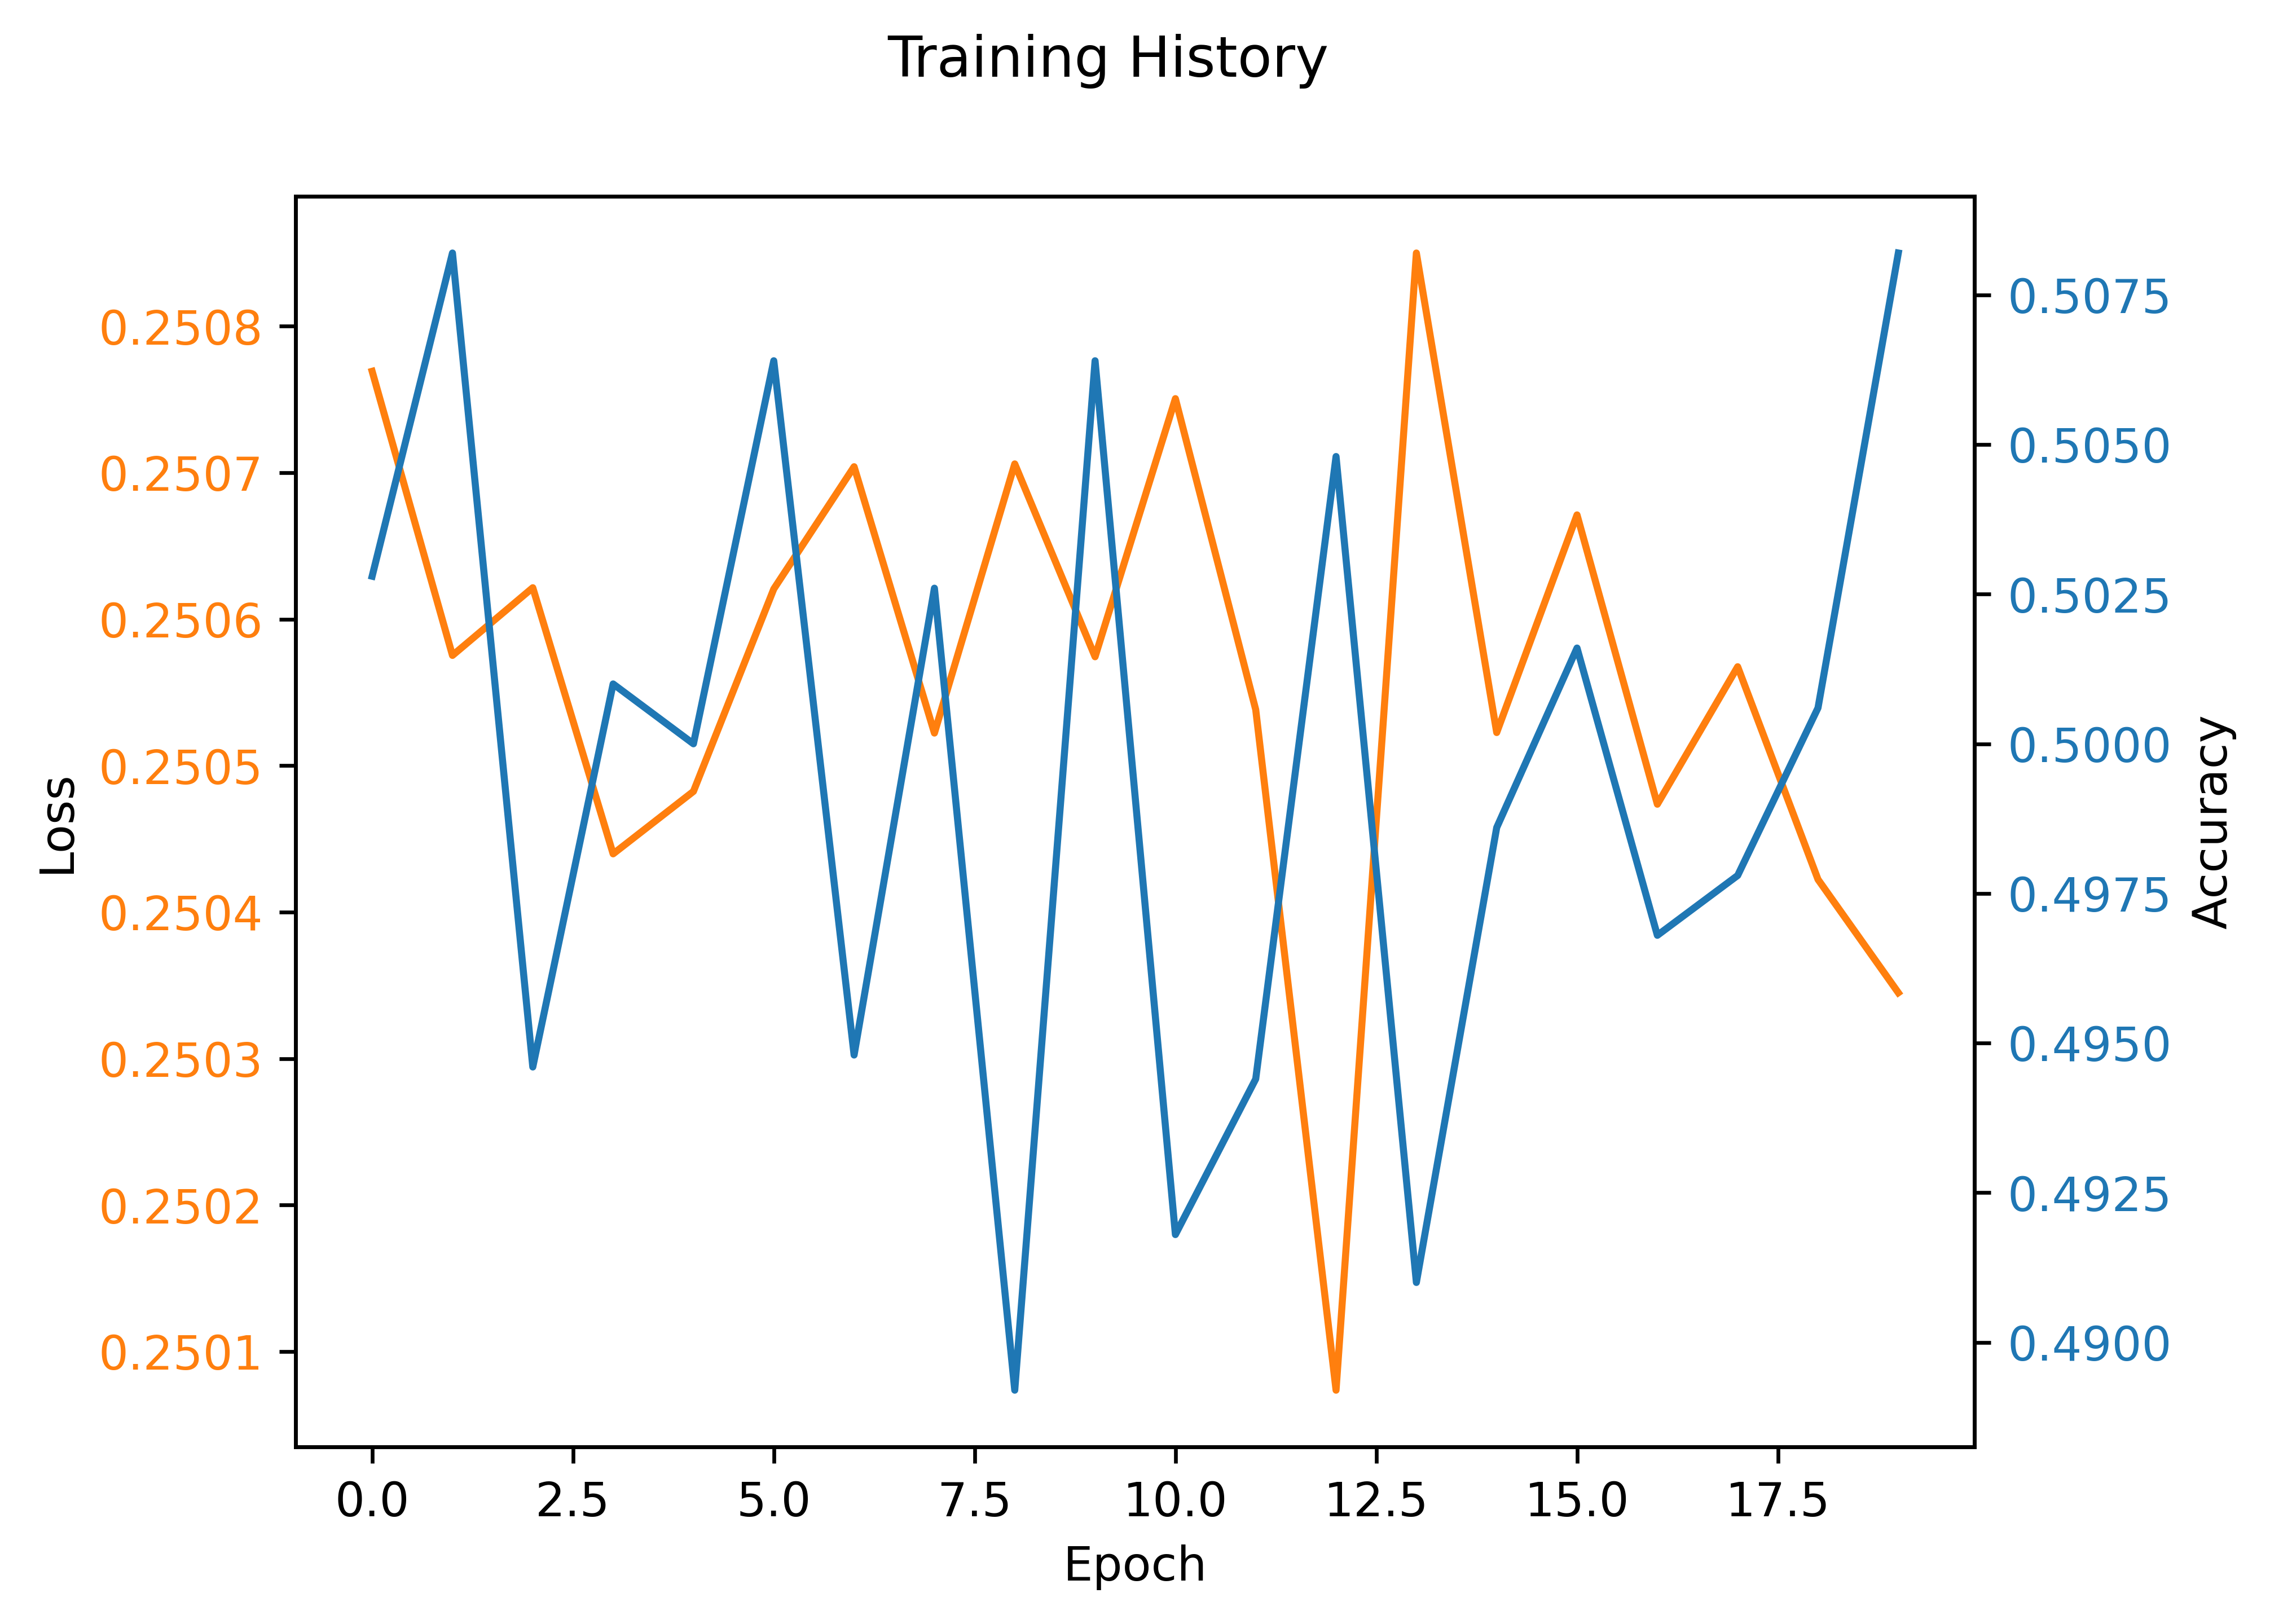

In [7]:
fig, ax1 = plt.subplots()
fig.suptitle("Training History")

ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.plot(history.history["loss"], color="tab:orange")
ax1.tick_params(axis="y", labelcolor="tab:orange")

ax2 = ax1.twinx()

ax2.set_ylabel("Accuracy")
ax2.plot(history.history["accuracy"], color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

plt.show()


### MNIST Test


**Loading MNIST Data**


In [8]:
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data()

# Flattening image and converting pixels to 0.0 -> 1.0
train_X = (train_X / 255).reshape((60000, 784))
test_X = (test_X / 255).reshape((10000, 784))

# One-hot encoding labels
train_y = np.eye(10, dtype=np.float32)[train_y]
test_y = np.eye(10, dtype=np.float32)[test_y]

**Creating Model**


In [11]:
NPL = [784, 100, 10]

model = create_model(NPL)
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.3),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=["accuracy"],
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 784)               615440    
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 694,950
Trainable params: 694,950
Non-trainable params: 0
_________________________________________________________________


**Training Model**


In [12]:
history = model.fit(train_X, train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0876 - accuracy: 0.2727
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0706 - accuracy: 0.5397
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0491 - accuracy: 0.7379
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0370 - accuracy: 0.8225
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0304 - accuracy: 0.8562
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0263 - accuracy: 0.8730
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0235 - accuracy: 0.8823
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0216 - accuracy: 0.8885
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0202 - accuracy: 0.8929
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

**Testing Model**


In [13]:
results = model.evaluate(test_X, test_y)
print(f"Test loss: {results[0]}, Test accuracy: {results[1]}")

313/313 [==============================] - 1s 1ms/step - loss: 0.0178 - accuracy: 0.9037
Test loss: 0.01778438501060009, Test accuracy: 0.9036999940872192


1/1 [==============================] - 0s 56ms/step
Expected output is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Network predicted: [1.6440166e-04 1.1823969e-01 8.7820965e-01 1.7727615e-01 3.9761714e-04
 6.0714158e-04 2.1135078e-03 3.5658071e-04 1.5345246e-01 1.5610496e-04]


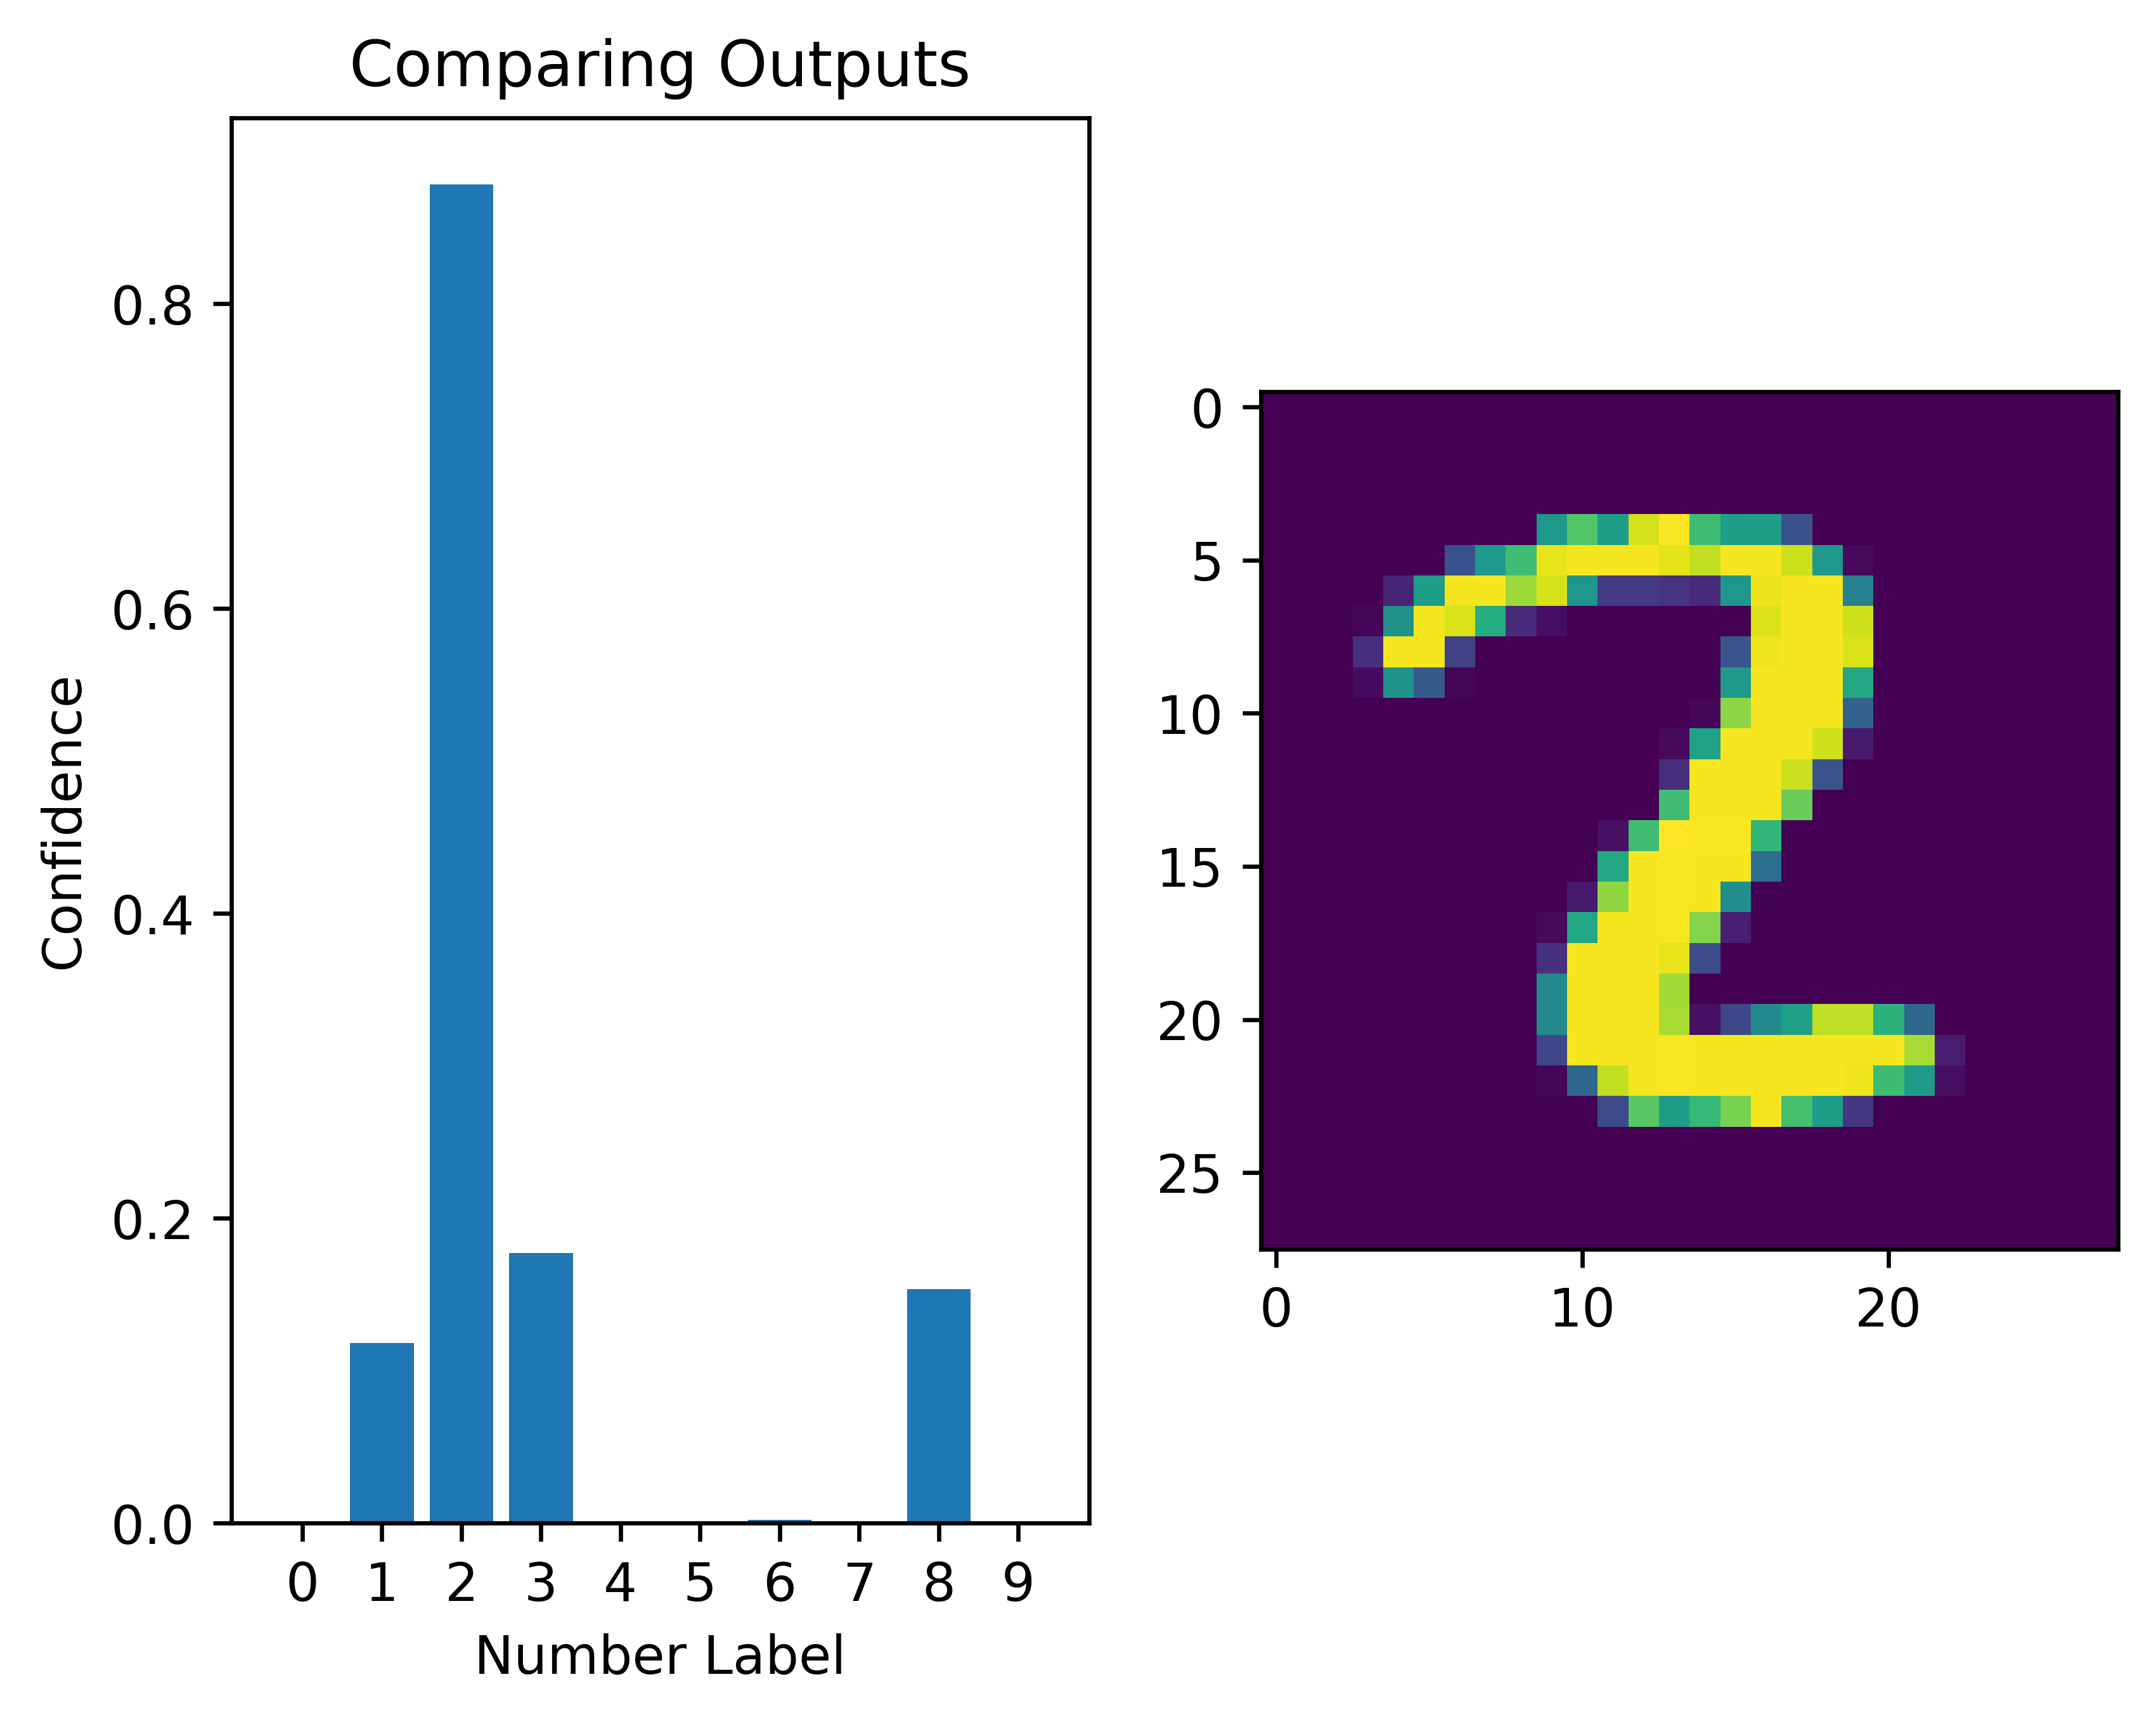

In [14]:
TEST_EXAMPLE = 4274

prediction = model.predict(test_X[TEST_EXAMPLE, None])

fig, axes = plt.subplots(1, 2)
axes[0].bar(x=[str(x) for x in range(10)], height=prediction[0])
axes[0].set_title("Comparing Outputs")
axes[0].set_ylabel("Confidence")
axes[0].set_xlabel("Number Label")

axes[1].imshow(test_X[TEST_EXAMPLE].reshape((28, 28)))

print(f"Expected output is {test_y[TEST_EXAMPLE]}")
print(f"Network predicted: {prediction[0]}")

**Plotting Training History**


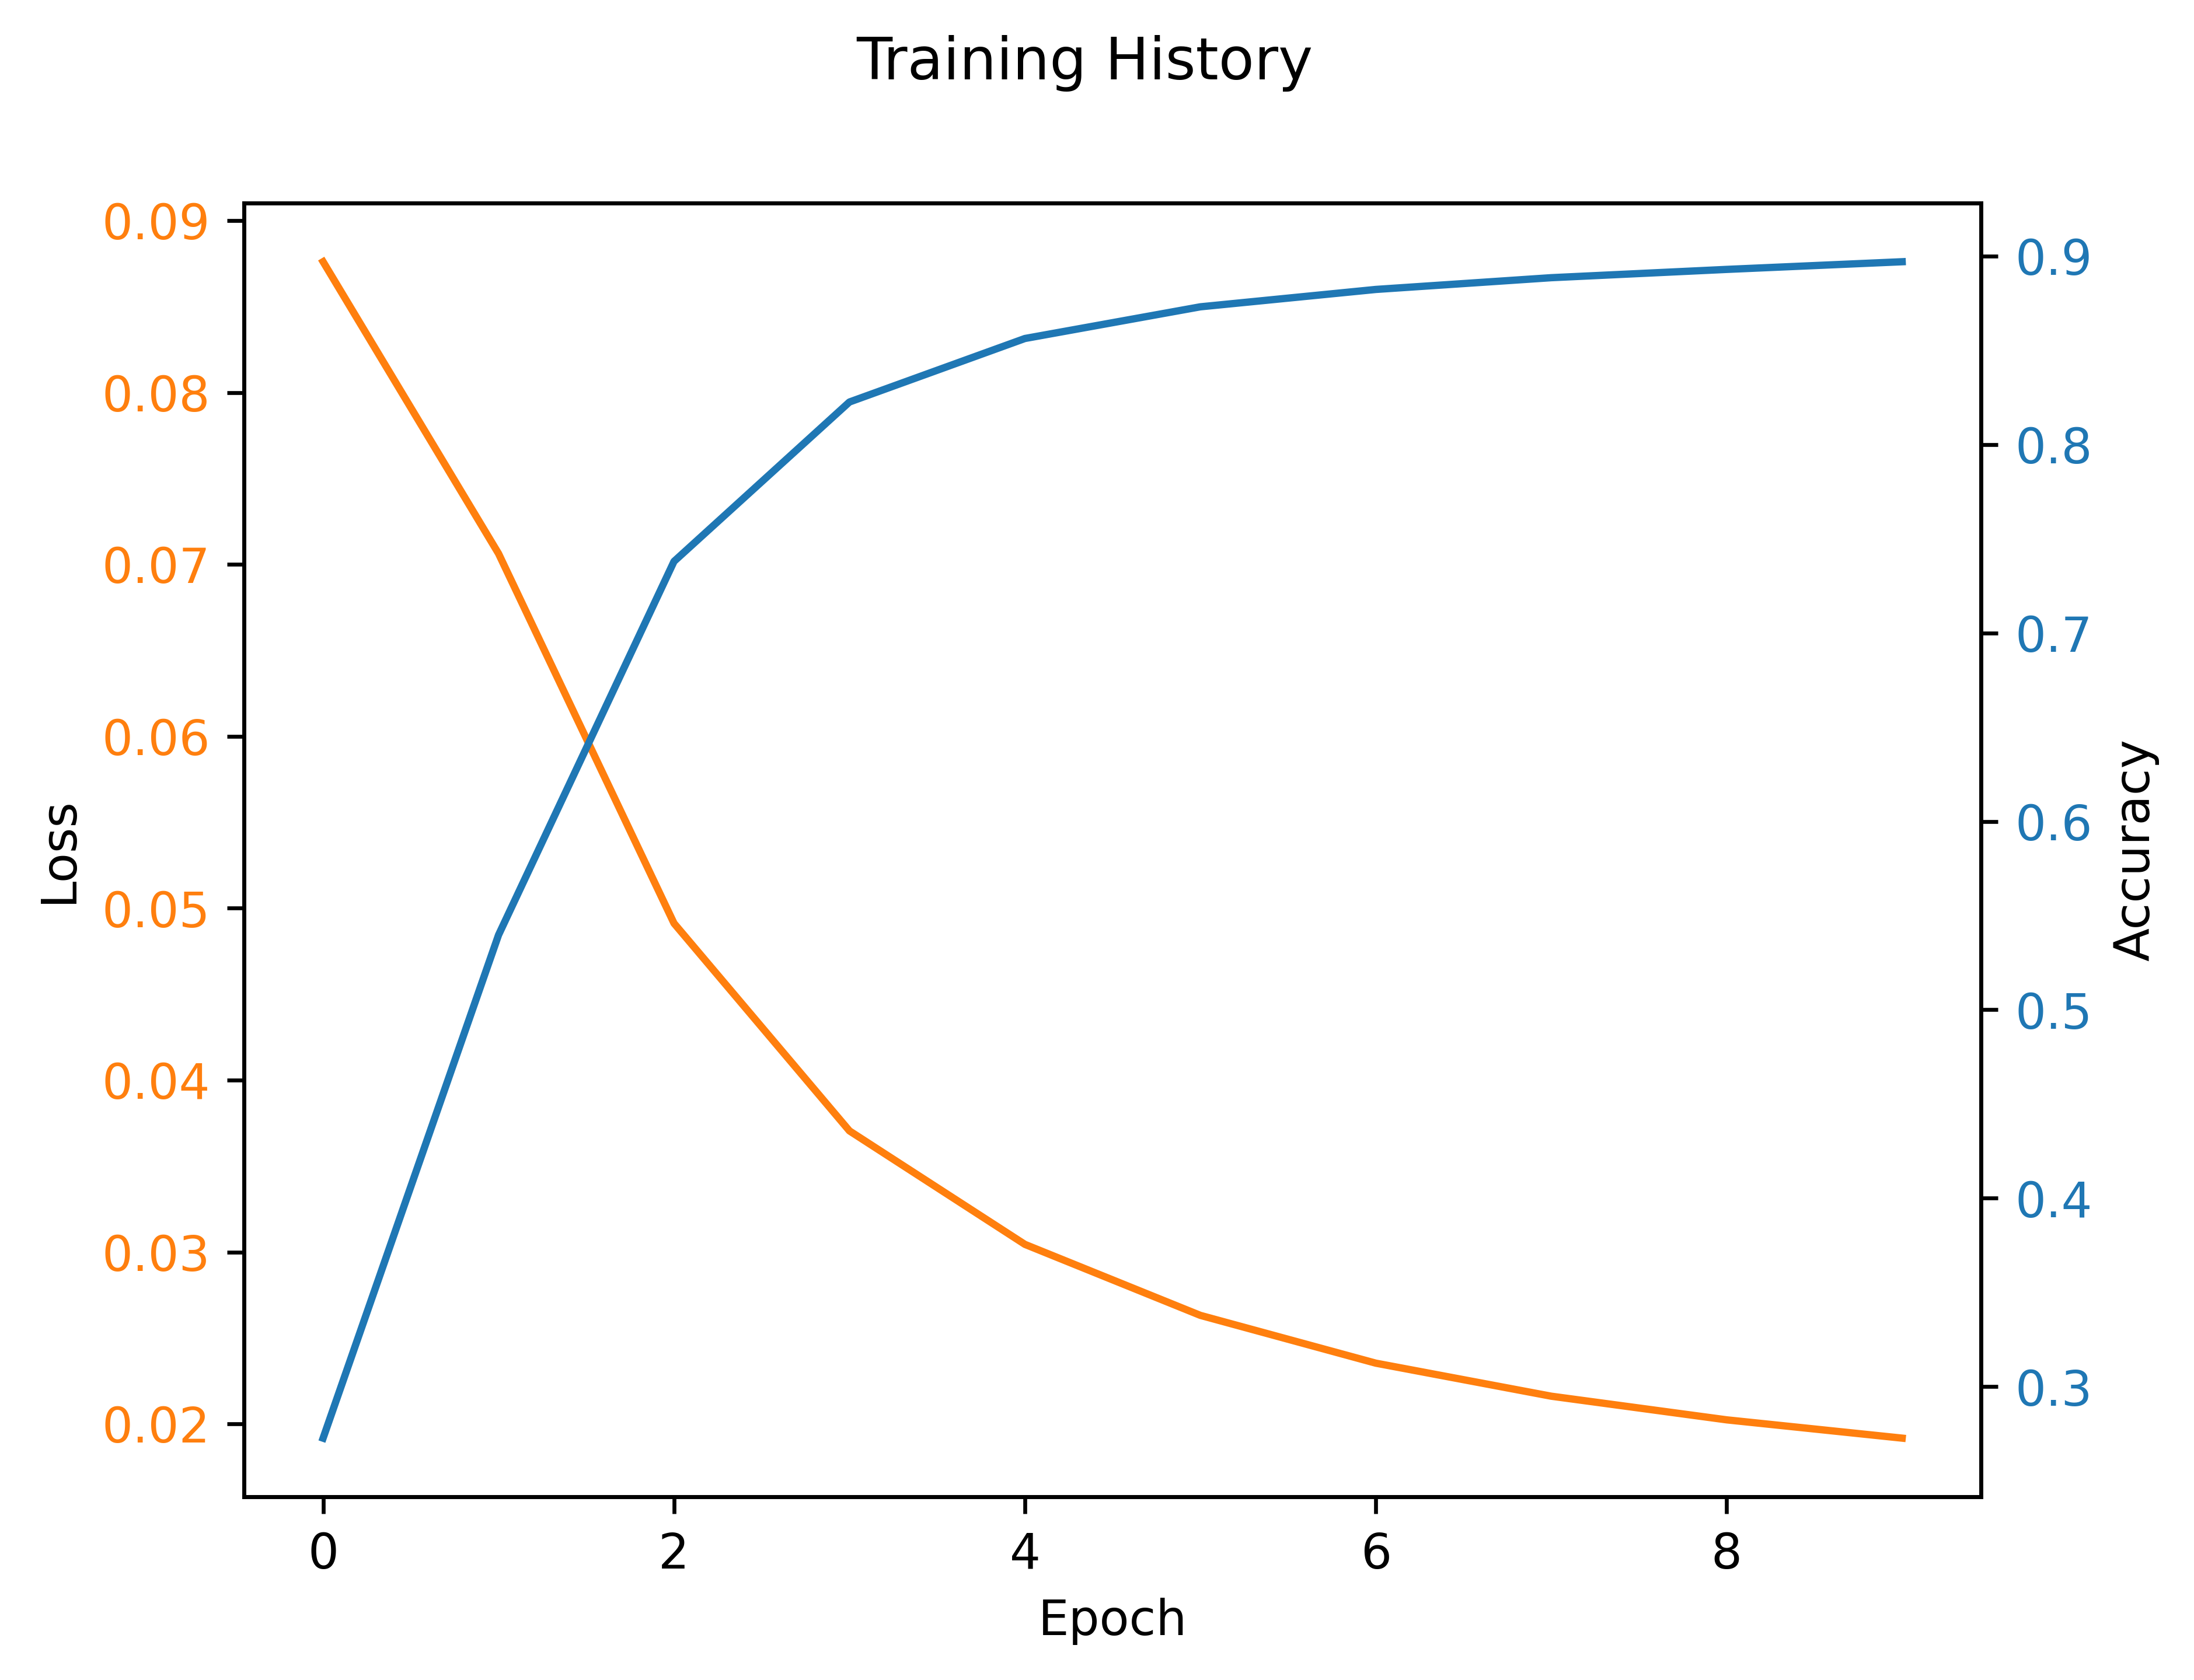

In [15]:
fig, ax1 = plt.subplots()
fig.suptitle("Training History")

ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.plot(history.history["loss"], color="tab:orange")
ax1.tick_params(axis="y", labelcolor="tab:orange")

ax2 = ax1.twinx()

ax2.set_ylabel("Accuracy")
ax2.plot(history.history["accuracy"], color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

plt.show()

**Plotting Weights**


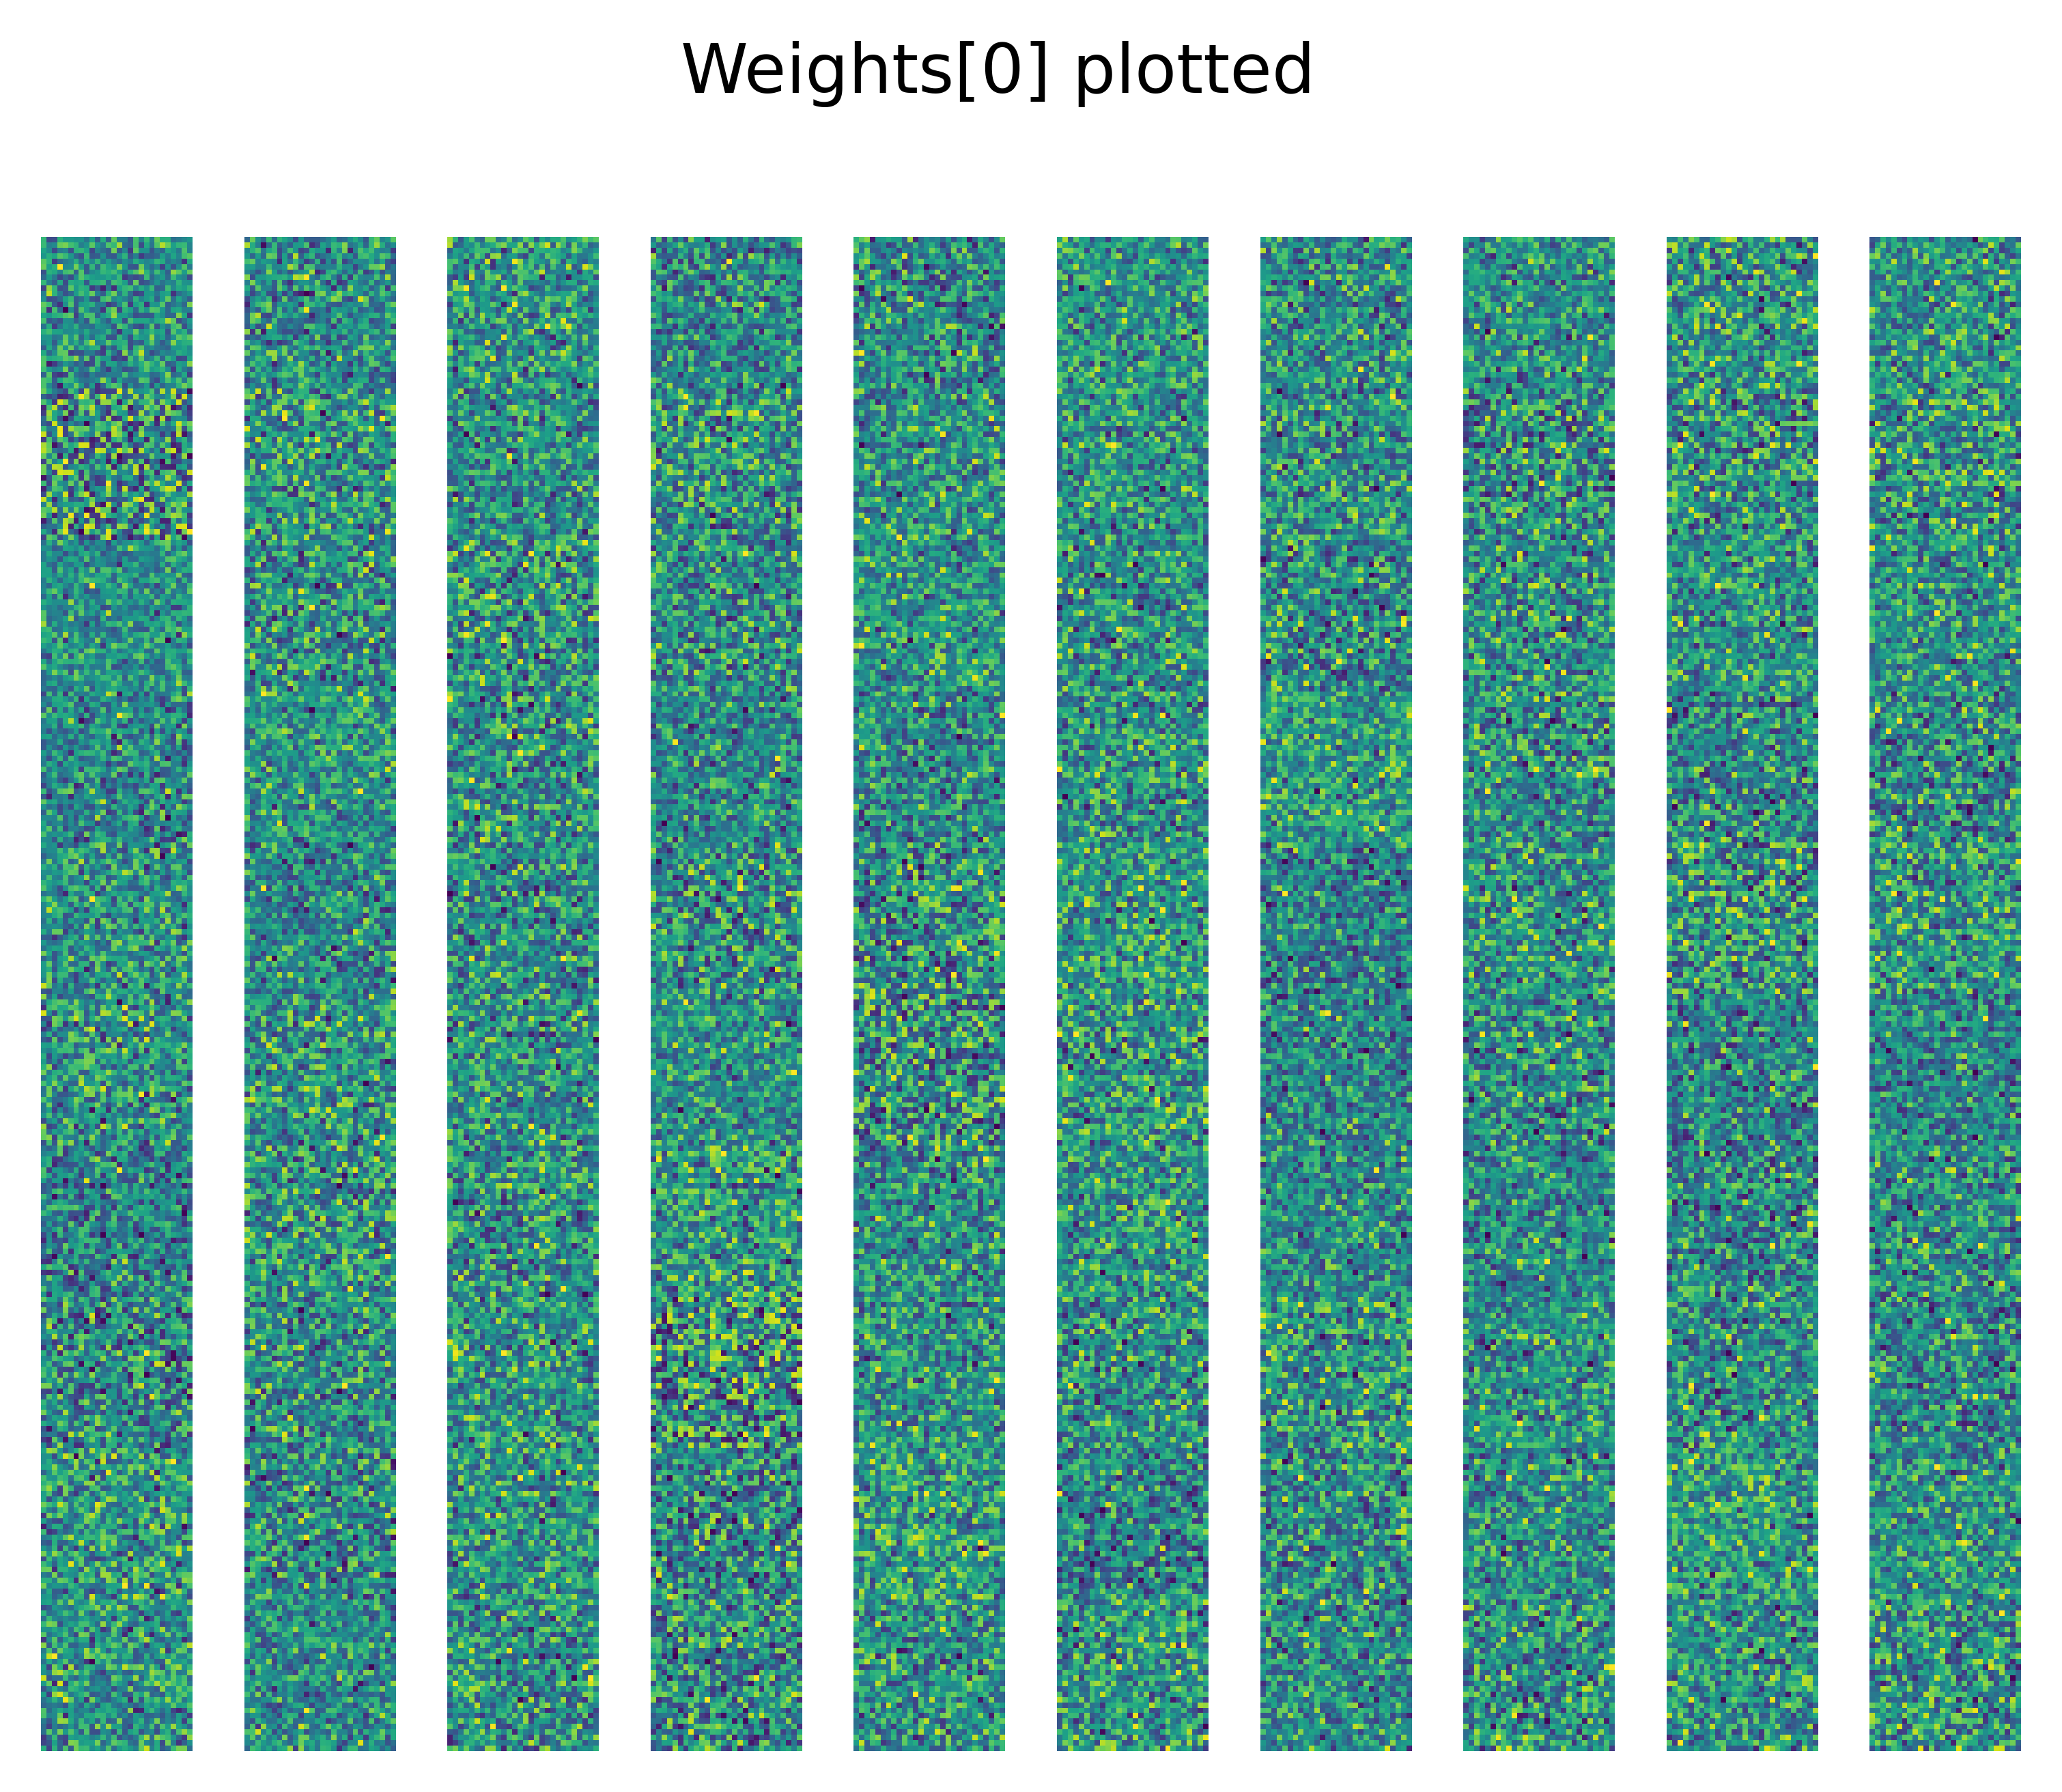

In [16]:
root_im = math.sqrt(NPL[1])
im_rows, im_cols = (math.floor(root_im), math.ceil(root_im))

curr_row = 0
curr_col = 0

fig, axes = plt.subplots(im_rows, im_cols)

fig.suptitle("Weights[0] plotted")

for weights in range(NPL[1]):
    if curr_col == im_cols:
        curr_col = 0
        curr_row += 1

    ax = axes[curr_row][curr_col]
    ax.axis("off")
    ax.imshow(model.layers[1].get_weights()[0][:, weights].reshape((28, 28)))

    curr_col += 1

fig.subplots_adjust(wspace=0, hspace=0)